This notebook is from github. Demo includes best response and FP.

In [12]:
import numpy 
import matplotlib.pyplot as plt
import random

In [13]:
def make_plot(data):
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8),dpi=220, facecolor='w', edgecolor='k')
    ax1.plot(data[:,0],label="first player")
    ax1.plot(data[:,1],label="second player")
    ax1.set_xlabel("iterations")
    ax1.set_ylabel("strategy")
    ax1.legend(loc="upper right", bbox_to_anchor=(1,-0.05))  
    
    ax2.plot(data[:,0],data[:,1],'.--',label="strategy profile")
    ax2.annotate("", xy=(data[1,0], data[1,1]), xytext=(data[0,0], data[0,1]),arrowprops=dict(arrowstyle="fancy"))
    ax2.set_xlabel("first player's strategy")
    ax2.set_ylabel("second player's strategy")
    ax2.legend()
    plt.show()

In [14]:
# payoff matrix for the two players in the 2x2 game
# first two rows are player 1's payoff matrix, and the last two player 2's

payoff_matrix = numpy.zeros([4,2])


payoff_matrix[:2,:] = [[1, -2],[-3, 1]]
payoff_matrix[2:,:] = [[-3, 1],[5, -1]]


# matching pennies
#payoff_matrix[:2,:] = [[1, -1],[-1, 1]]
#payoff_matrix[2:,:] = [[-1, 1],[1, -1]]


# coordination game
#payoff_matrix[:2,:] = [ [1, 0], [0, 2]]
#payoff_matrix[2:,:] = [ [2, 0], [0, 1]]
payoff_matrix[:2,:] = [ [1, 0], [0, 1]]
payoff_matrix[2:,:] = [ [1, 0], [0, 1]]

# prisoner's dilemma
# payoff_matrix[:2,:] = [ [-1, -10], [0, -5]]
# payoff_matrix[2:,:] = [ [-1, 0], [-10, -5]]

# random game (with positive payoffs in [0,1])
#payoff_matrix = numpy.random.rand(4,2)

# random zero sum game (with positive payoffs for player 1 in [0,1])
#payoff_matrix = numpy.random.rand(4,2)
#payoff_matrix[2:,:]=-payoff_matrix[:2,:]

In [9]:
# import random


# strategy1 = numpy.zeros([num_iter,4]) # 20x3
# strategy1[0, random.randint(0,4)] = 1
# strategy1

Best response

In [15]:
# number of iterations
num_iter = 20

# 'strategy' stores each players' mixed strategy (probability of action 1 in each case)
strategy = numpy.zeros([num_iter,3])


payoffs = numpy.zeros([2,2])


for i in range(1,num_iter):

    # calculate payoff of player 1 assuming player 2 plays the strategy played in the previous round
    payoffs[0,0] = (1- strategy[i-1,1])*payoff_matrix[0,0] + strategy[i-1,1]*payoff_matrix[0,1]
    payoffs[1,0] = (1- strategy[i-1,1])*payoff_matrix[1,0] + strategy[i-1,1]*payoff_matrix[1,1]

    # calculate payoff of player 2 assuming player 1 plays the strategy played in the previous round
    payoffs[0,1] = (1-strategy[i-1,0])*payoff_matrix[2,0] + strategy[i-1,0]*payoff_matrix[3,0]
    payoffs[1,1] = (1-strategy[i-1,0])*payoff_matrix[2,1] + strategy[i-1,0]*payoff_matrix[3,1]


    # player 1's best response
    if payoffs[0,0] < payoffs[1,0]:
        strategy[i,0] = 1
    elif payoffs[0,0] > payoffs[1,0]:
        strategy[i,0] = 0
    else:
        strategy[i,0] = strategy[i-1,0]


    # player 2's best response
    if  payoffs[0,1] < payoffs[1,1]:
        strategy[i,1] = 1
    elif payoffs[0,1] > payoffs[1,1]:
        strategy[i,1] = 0
    else:
        strategy[i,1] = strategy[i-1,1]


    # store the (normalized) number of iterations
    strategy[i,2] = i/num_iter

In [11]:
a = np.zeros([2,2,3])
a[0]

NameError: name 'np' is not defined

In [16]:
num_iter = 20
num_strategy = 4
num_players = 2
strategys = numpy.zeros([num_players, num_iter, num_strategy])
for p in range(num_players):
    strategys[p][0, random.randint(0,3)] = 1

strategys[0][0, :]

array([0., 0., 1., 0.])

Best response: 4 strategies

In [17]:
# case 1
payoff_matrix = numpy.zeros([num_players, num_strategy, num_strategy])

payoff_matrix[0] = [ [-103, -4, -103, -4], [-3, -6, -6, -3], [-101, -5, -104, -2], [-7, -7, -7, -7]]
payoff_matrix[1] = [ [-103, -3, -101, -7], [-4, -6, -5, -7], [-103, -6, -104, -7], [-4, -3, -2, -7]]
payoff_matrix

array([[[-103.,   -4., -103.,   -4.],
        [  -3.,   -6.,   -6.,   -3.],
        [-101.,   -5., -104.,   -2.],
        [  -7.,   -7.,   -7.,   -7.]],

       [[-103.,   -3., -101.,   -7.],
        [  -4.,   -6.,   -5.,   -7.],
        [-103.,   -6., -104.,   -7.],
        [  -4.,   -3.,   -2.,   -7.]]])

In [18]:
# case 1
payoff_matrix = numpy.zeros([num_players, num_strategy, num_strategy])

payoff_matrix[0] = [ [-103, -4, -4, -4], [-3, -6, -3, -3], [-9, -9, -9, -9], [-7, -7, -7, -10]]
payoff_matrix[1] = [ [-103, -3, -9, -7], [-4, -6, -9, -7], [-4, -3, -9, -7], [-4, -3, -9, -10]]
payoff_matrix

array([[[-103.,   -4.,   -4.,   -4.],
        [  -3.,   -6.,   -3.,   -3.],
        [  -9.,   -9.,   -9.,   -9.],
        [  -7.,   -7.,   -7.,  -10.]],

       [[-103.,   -3.,   -9.,   -7.],
        [  -4.,   -6.,   -9.,   -7.],
        [  -4.,   -3.,   -9.,   -7.],
        [  -4.,   -3.,   -9.,  -10.]]])

In [19]:
# case 1
payoff_matrix = numpy.zeros([num_players, num_strategy, num_strategy])

payoff_matrix[0] = [ [-104, -5, -5, -4], [-8, -9, -7, -7], [-12, -12, -16, -14], [-9, -9, -11, -13]]
payoff_matrix[1] = [ [-104, -8, -12, -9], [-5, -9, -12, -9], [-5, -7, -16, -11], [-4, -7, -14, -13]]
payoff_matrix

array([[[-104.,   -5.,   -5.,   -4.],
        [  -8.,   -9.,   -7.,   -7.],
        [ -12.,  -12.,  -16.,  -14.],
        [  -9.,   -9.,  -11.,  -13.]],

       [[-104.,   -8.,  -12.,   -9.],
        [  -5.,   -9.,  -12.,   -9.],
        [  -5.,   -7.,  -16.,  -11.],
        [  -4.,   -7.,  -14.,  -13.]]])

In [20]:
# number of iterations
num_iter = 5
num_strategy = 4
num_players = 2

# 'strategy' stores each players' mixed strategy (probability of action 1 in each case)
strategys = numpy.zeros([num_players, num_iter, num_strategy])

# for four strategies 
payoffs = numpy.zeros([4,2]) 

# random initialization p1 p2
'''
m = numpy.zeros([2])
m[0] = random.randint(0,3)
strategys[0][0, int(m[0])] = 1
m[1] = random.randint(0,3)
strategys[1][0, int(m[1])] = 1
'''

m = numpy.zeros([2])
m[0] = 3
strategys[0][0, int(m[0])] = 1
m[1] = 3
strategys[1][0, int(m[1])] = 1

payoff_temp = numpy.zeros([4,4])

for i in range(1,num_iter):

    if i % 2: # 1,3,5,7 ...
        payoff_temp = strategys[1][i-1, :].reshape(1,4) * payoff_matrix[0]
        payoffs[:,0] = payoff_temp[:, int(m[1])]
        
        if max(payoffs[:, 0]) > np.sum(payoffs[:,0] * strategys[0][i-1,:]):
            strategys[0][i, np.argmax(payoffs[:,0])] = 1
        else:
            strategys[0][i, :] = strategys[0][i-1,:]
        strategys[1][i, :] = strategys[1][i-1,:]
        
    else: 
        payoff_temp = strategys[0][i-1, :].reshape(4,1) * payoff_matrix[1]
        payoffs[:,1] = payoff_temp[int(m[0]),:]
        
        if max(payoffs[:, 1]) > np.sum(payoffs[:,1] * strategys[1][i-1,:]):
            strategys[1][i, np.argmax(payoffs[:,1])] = 1
        else:
            strategys[1][i, :] = strategys[1][i-1,:]
        strategys[0][i, :] = strategys[0][i-1,:]

    # update m
    m[0] = np.where(strategys[0][i, :] == 1)[0]
    m[1] = np.where(strategys[1][i, :] == 1)[0]
    
print(strategys)


NameError: name 'np' is not defined

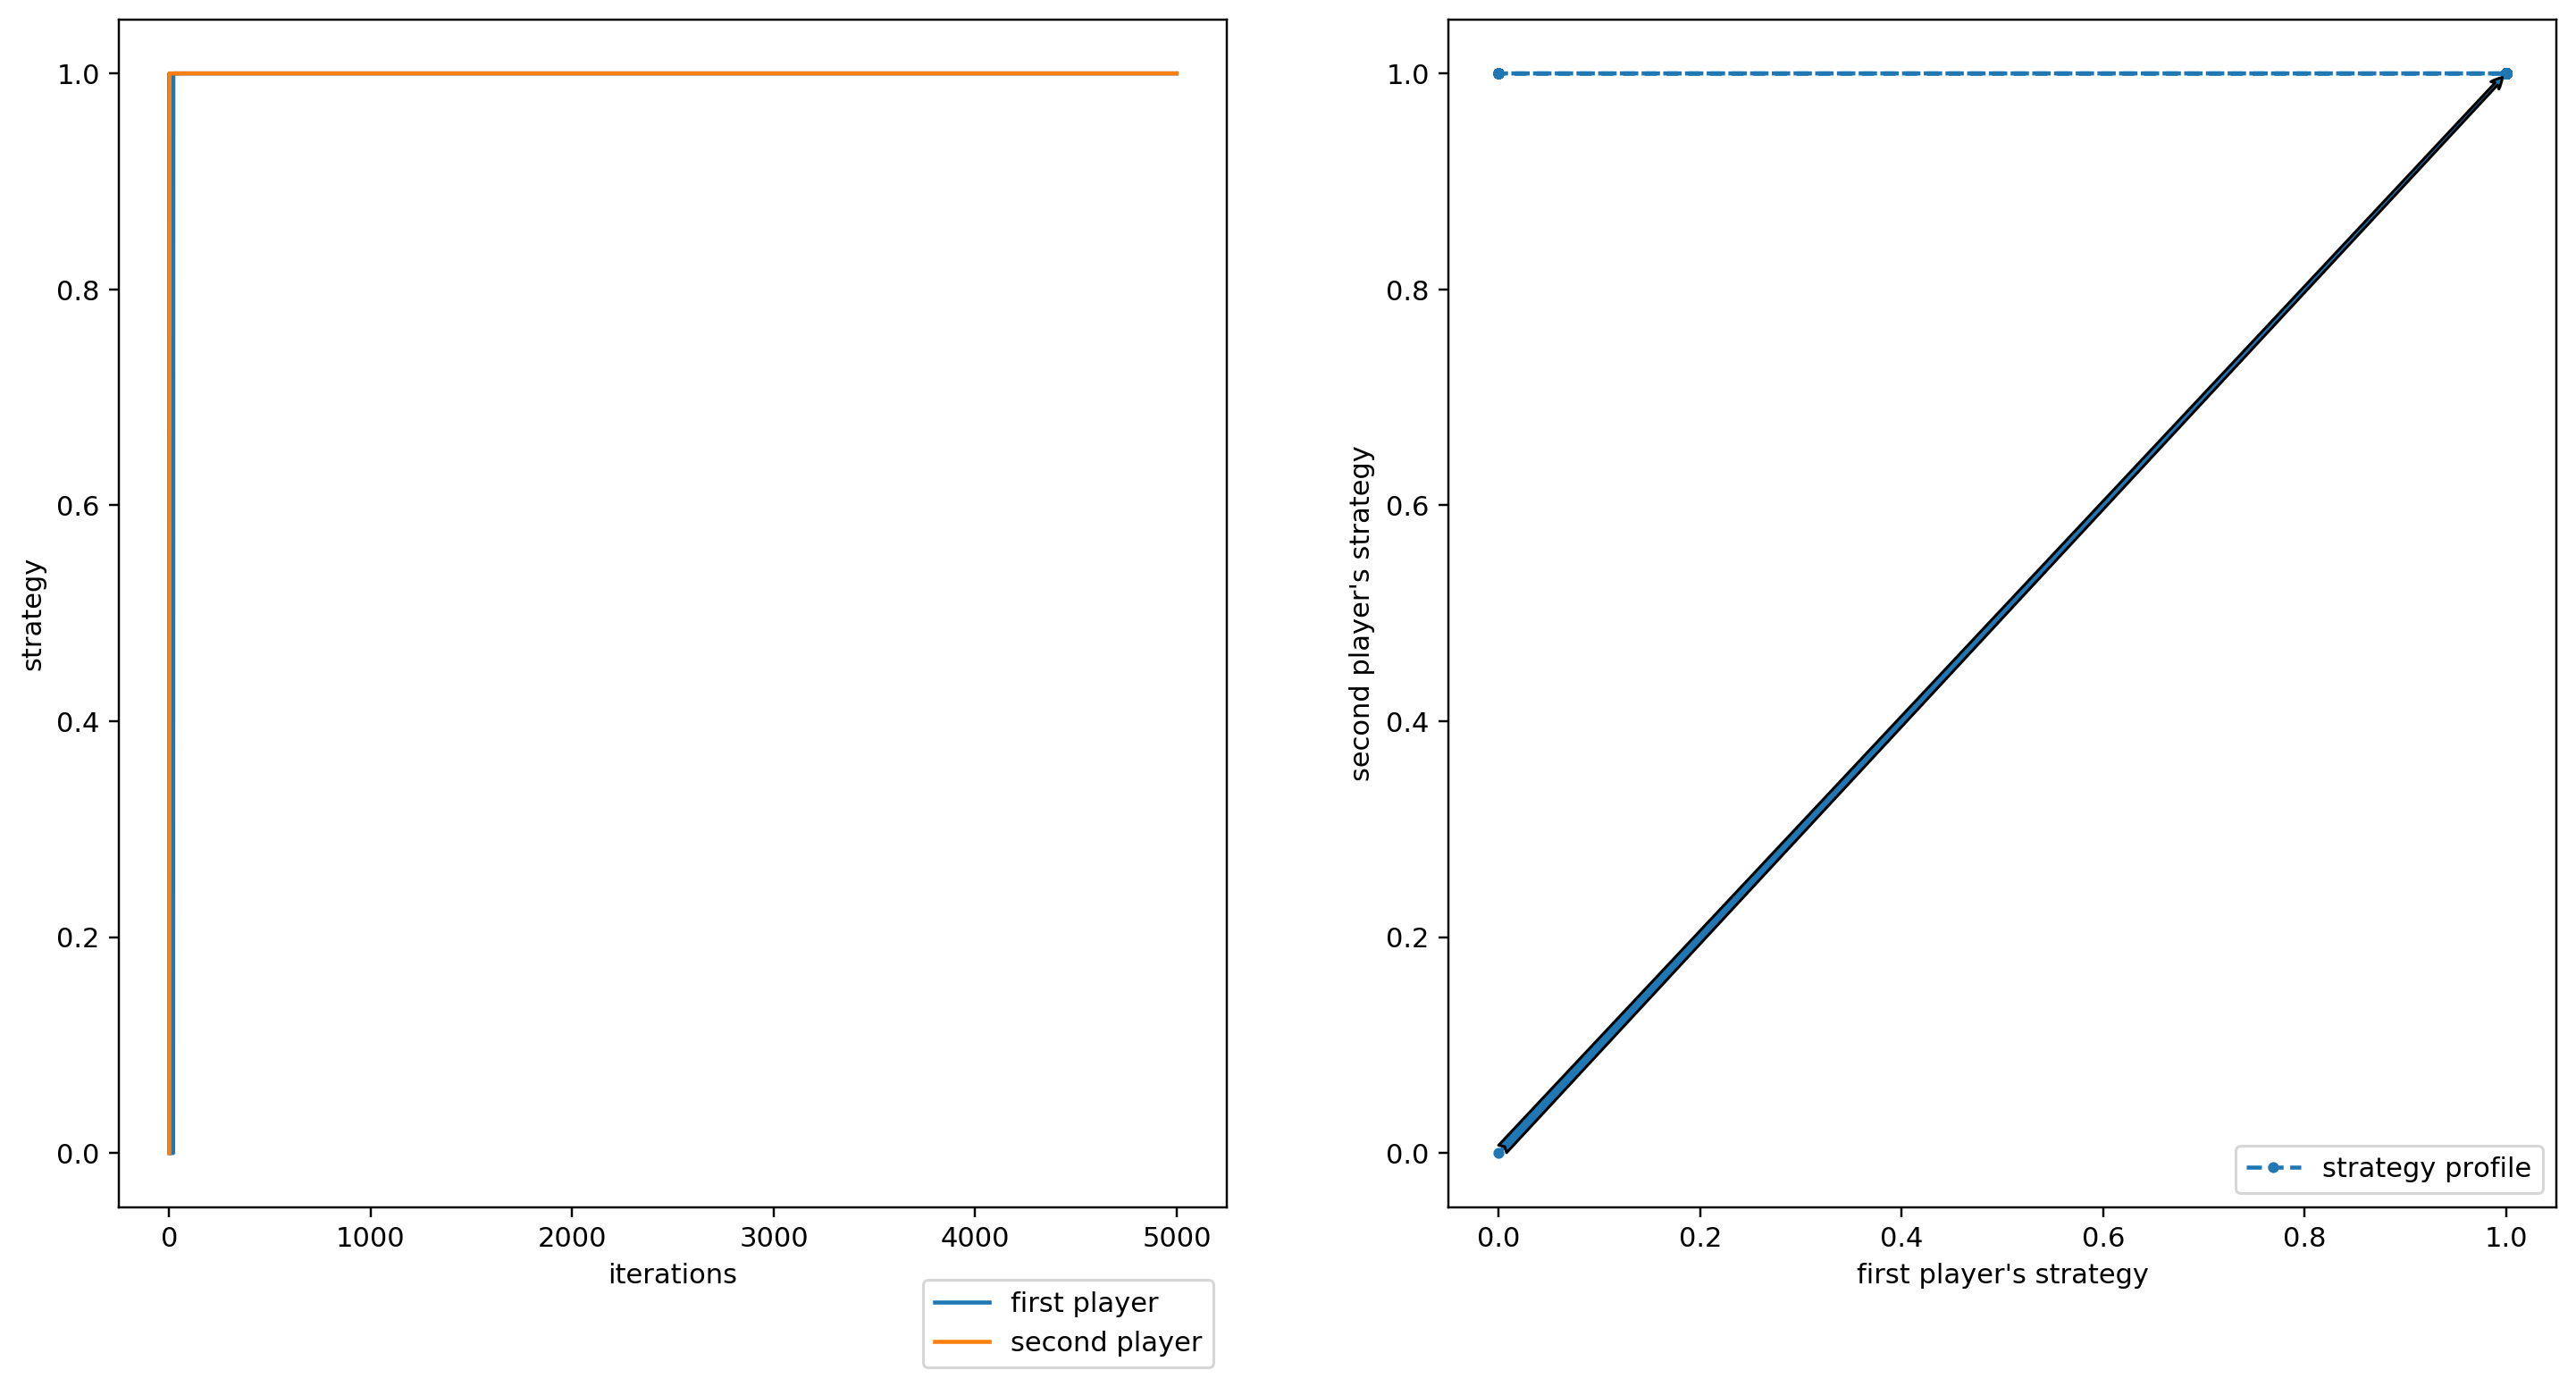

In [83]:
make_plot(strategy)

Ficticious Play

In [152]:
# number of iterations
num_iter = 5
num_strategy = 4
num_players = 2

# 'strategy' stores each players' mixed strategy (probability of action 1 in each case)
strategys = numpy.zeros([num_players, num_iter, num_strategy])

# for four strategies 
payoffs = numpy.zeros([4,2]) 

# random initialization p1 p2

'''
m = numpy.zeros([2])
m[0] = random.randint(0,3)
strategys[0][0, int(m[0])] = 1
m[1] = random.randint(0,3)
strategys[1][0, int(m[1])] = 1
'''

m = numpy.zeros([2])
m[0] = 3
strategys[0][0, int(m[0])] = 1
m[1] = 3
strategys[1][0, int(m[1])] = 1

payoff_temp = numpy.zeros([4,4])

for i in range(1,num_iter):

    if i % 2: # 1,3,5,7 ...
        payoff_temp = strategys[1][i-1, :].reshape(1,4) * payoff_matrix[0]
        payoffs[:,0] = payoff_temp[:, int(m[1])]
        
        if max(payoffs[:, 0]) > np.sum(payoffs[:,0] * strategys[0][i-1,:]):
            strategys[0][i, np.argmax(payoffs[:,0])] = 1
        else:
            strategys[0][i, :] = strategys[0][i-1,:]
        strategys[1][i, :] = strategys[1][i-1,:]
        
    else: 
        payoff_temp = strategys[0][i-1, :].reshape(4,1) * payoff_matrix[1]
        payoffs[:,1] = payoff_temp[int(m[0]),:]
        
        if max(payoffs[:, 1]) > np.sum(payoffs[:,1] * strategys[1][i-1,:]):
            strategys[1][i, np.argmax(payoffs[:,1])] = 1
        else:
            strategys[1][i, :] = strategys[1][i-1,:]
        strategys[0][i, :] = strategys[0][i-1,:]

    # update m
    m[0] = np.where(strategys[0][i, :] == 1)[0]
    m[1] = np.where(strategys[1][i, :] == 1)[0]
    
print(strategys)


ValueError: operands could not be broadcast together with shapes (1,4) (2,) 

In [153]:
# number of iterations
num_iter = 5000

# 'strategy' stores each players' mixed strategy (probability of action 1 in each case)
strategy = numpy.zeros([num_iter,3])

# 'empirical' stores the empirical distribution of each players' actions
empirical = numpy.zeros([num_iter,3])

payoffs = numpy.zeros([2,2])

for i in range(1,num_iter):
    

    # calculate payoff of player 1 assuming the other player plays according to empirical dist.
    payoffs[0,0] = (1-empirical[i-1,1])*payoff_matrix[0,0] + empirical[i-1,1]*payoff_matrix[0,1]
    payoffs[1,0] = (1-empirical[i-1,1])*payoff_matrix[1,0] + empirical[i-1,1]*payoff_matrix[1,1]

    # calculate payoff of player 2 assuming the other player plays according to empirical dist.
    payoffs[0,1] = (1-empirical[i-1,0])*payoff_matrix[2,0] + empirical[i-1,0]*payoff_matrix[3,0]
    payoffs[1,1] = (1-empirical[i-1,0])*payoff_matrix[2,1] + empirical[i-1,0]*payoff_matrix[3,1]


    # player 1's best response
    if payoffs[0,0] < payoffs[1,0]:
        strategy[i,0] = 1
    elif payoffs[0,0] > payoffs[1,0]:
        strategy[i,0] = 0
    else:
        strategy[i,0] = strategy[i-1,0]


    # player 2's best response
    if  payoffs[0,1] < payoffs[1,1]:
        strategy[i,1] = 1
    elif payoffs[0,1] > payoffs[1,1]:
        strategy[i,1] = 0
    else:
        strategy[i,1] = strategy[i-1,1]


    # update the empirical distribution
    empirical[i,0] = ((i-1)*empirical[i-1,0] + strategy[i,0])/i
    empirical[i,1] = ((i-1)*empirical[i-1,1] + strategy[i,1])/i
        
    # store the (normalized) number of iterations
    strategy[i,2] = i/num_iter
    empirical[i,2] = i/num_iter

In [47]:
strategy

array([[0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 2.000e-04],
       [1.000e+00, 1.000e+00, 4.000e-04],
       ...,
       [1.000e+00, 1.000e+00, 9.994e-01],
       [1.000e+00, 1.000e+00, 9.996e-01],
       [1.000e+00, 1.000e+00, 9.998e-01]])

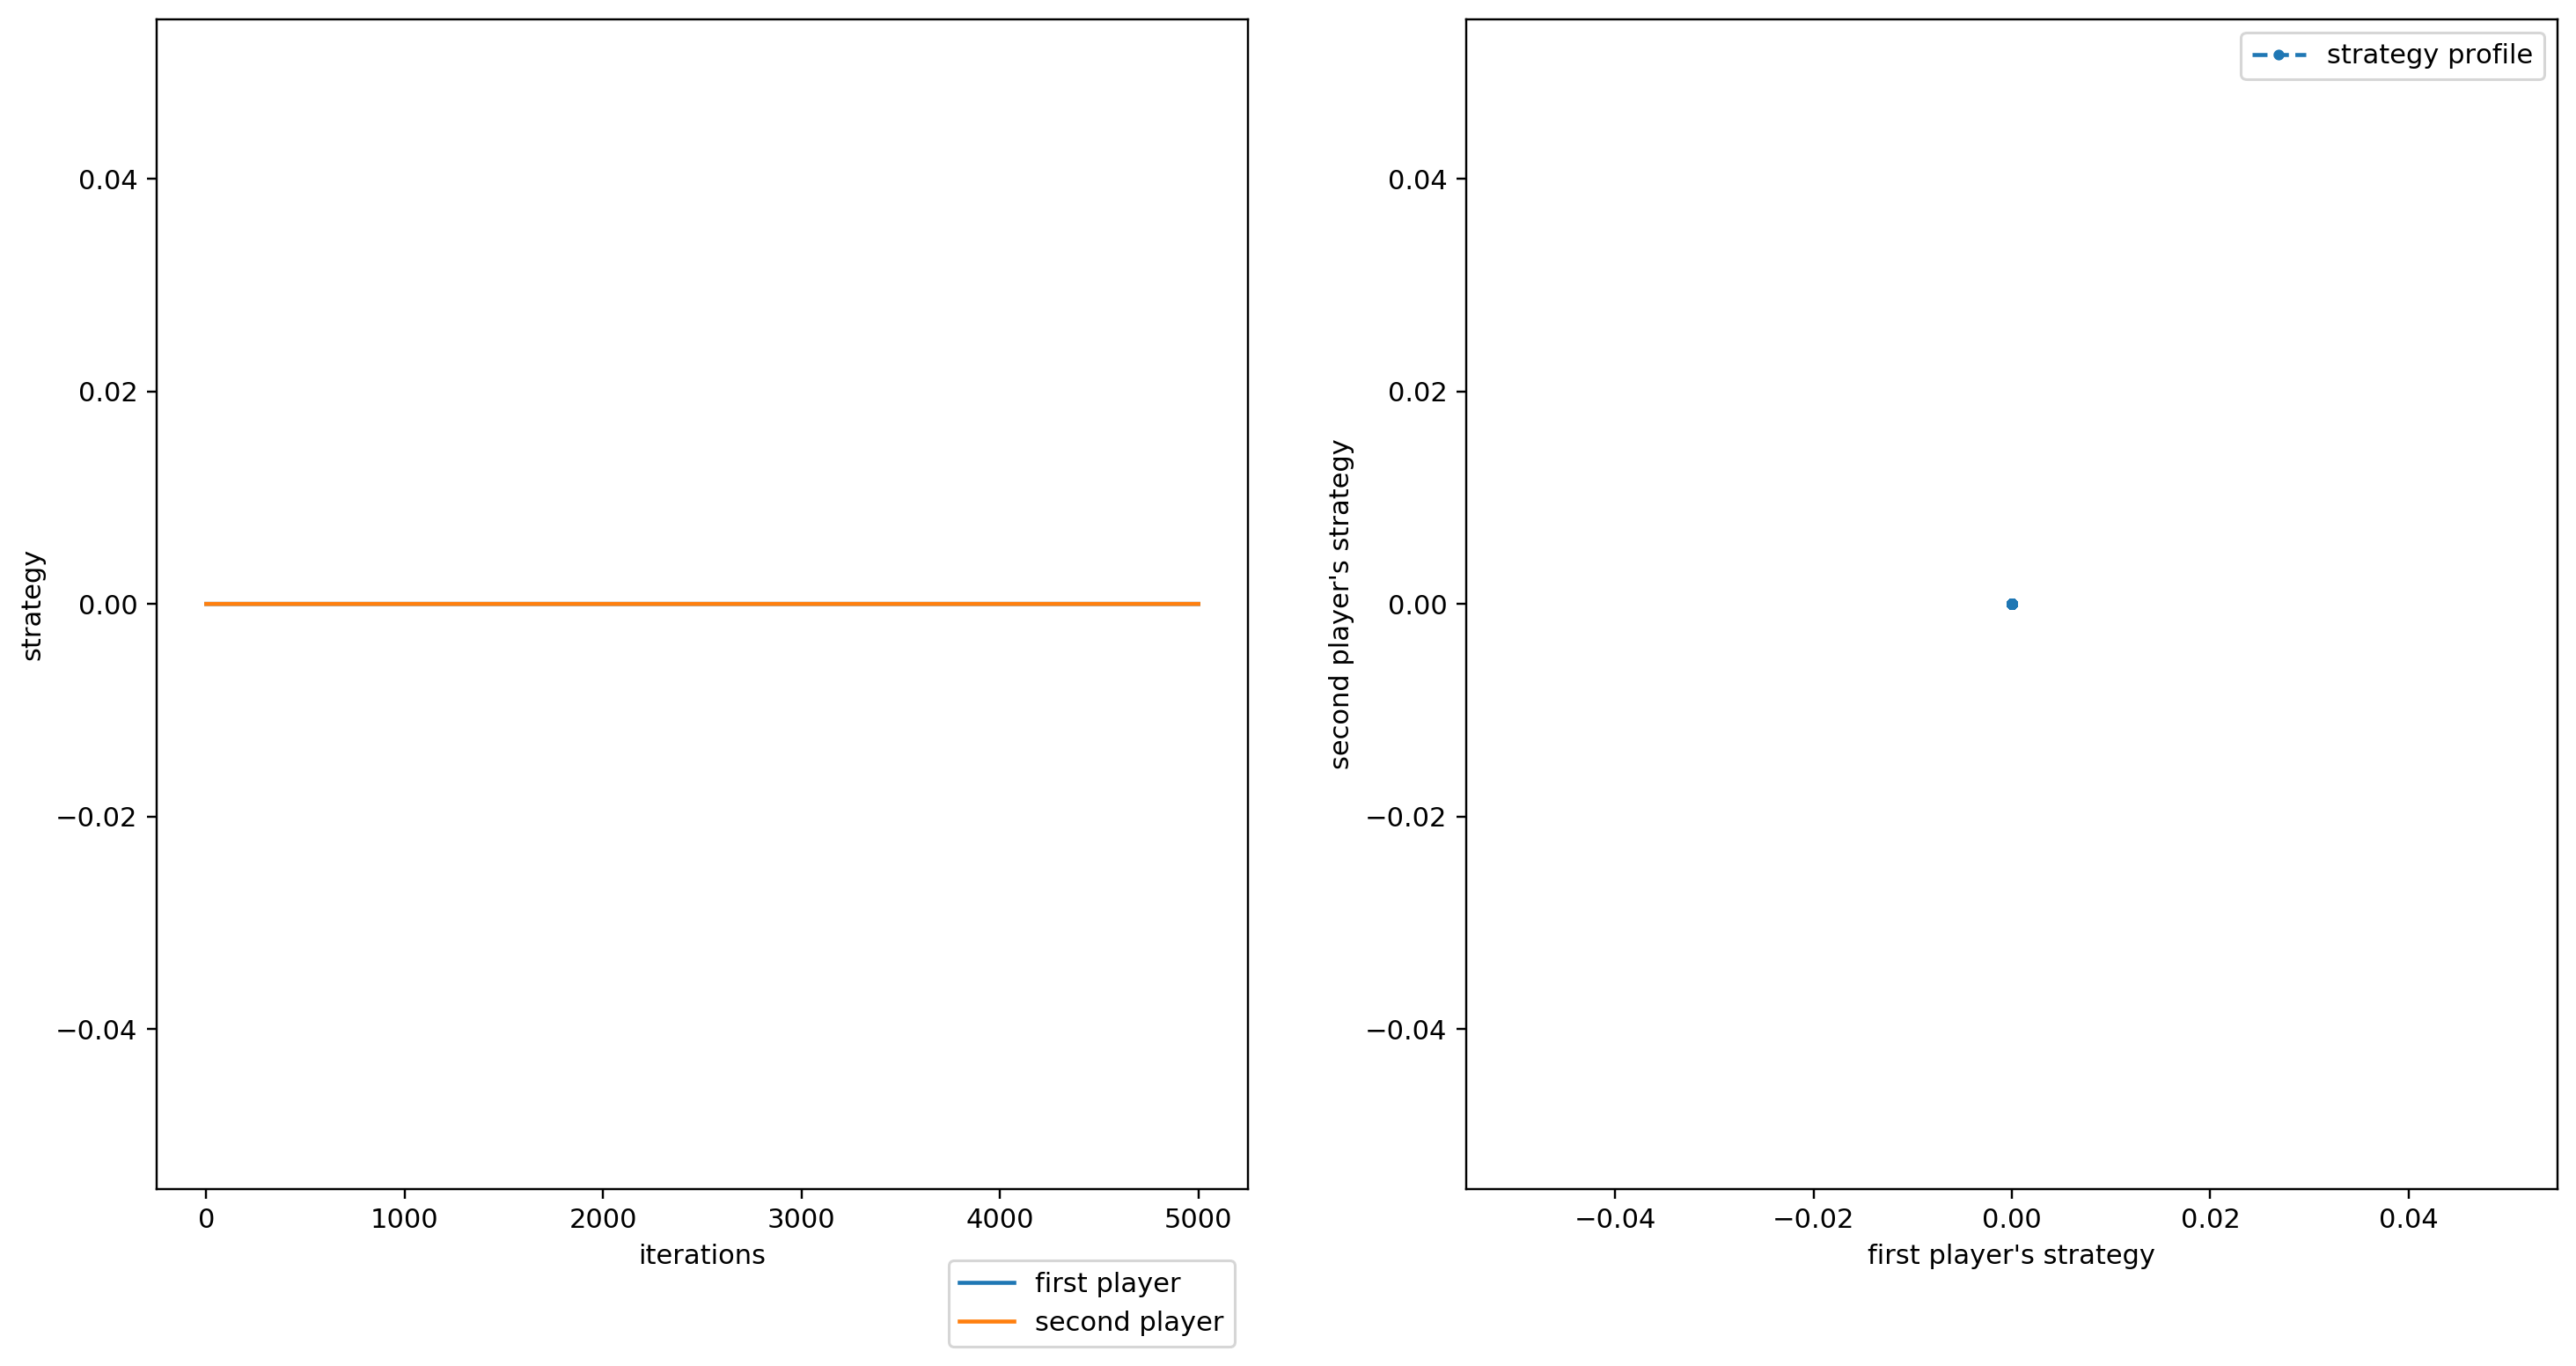

In [154]:
make_plot(strategy)